# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


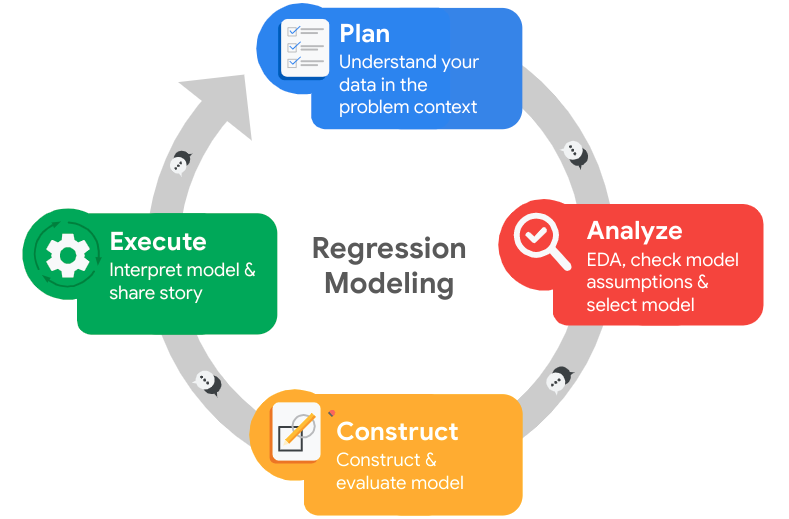

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are the HR department of Salifort Motors who seek to find ways to reduce employee turn-over as hiring and training employees is expensive.
There 3008 duplicated rows and no missing values. The maximum value of average working hours of 310 is very high, implying that the employee worked 10 hours per day during a 31 day month and more during shorter months. The lowest observed satisfaction level is 0.09.

Important questions to ask are:
- Where the participants chosen at random?
- Was participation anonymous? Did participants "feel pressured" to respond in a certain way ("social desirabiliyt bias")?

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(20)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = (df0
 .rename(columns={"Work_accident": "work_accident",
                  "left": "has_left",
                  "Department": "department_name",
                  "promotion_last_5years": "promoted_recently",
                 "time_spend_company": "tenure",
                 "average_montly_hours": "average_monthly_hours",
                 "number_project": "number_projects"}
        )
)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'has_left',
       'promoted_recently', 'department_name', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()
# no missing values

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
has_left                 0
promoted_recently        0
department_name          0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
(df0[df0.duplicated() == True]
 .sort_values(['satisfaction_level', 'last_evaluation', 'number_projects',
               'average_monthly_hours', 'tenure', 'work_accident',
               'has_left', 'promoted_recently', 'department_name', 'salary']
             )
)


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,has_left,promoted_recently,department_name,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_no_dups = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df_no_dups


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,has_left,promoted_recently,department_name,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

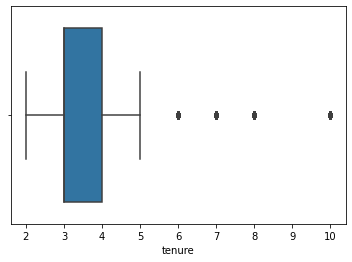

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df_no_dups, x="tenure")

# Values above 5 years can be considered as outliers


In [12]:
# Determine the number of rows containing outliers
(df_no_dups
 .query("tenure > 5")
 .tenure
 .value_counts()
 .sum()
)
# 824 rows contain outliers



824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




EDA is required to gain an understanding of the underlying data. It is used to determine which predictors might be useful during modeling. It helps to understand the relationshop between the different variables and can be used to visually verify some assumptions about the data.

16.60 % of all pariticipants left the company.

Only very few employees receive a high salary, the biggest group of employees receives a low salary. There are quite a few employees with a very low satisfaction. The share of employees who left is lowest in R&D and management and highest in HR.
The distribtion of average monthly working hours is bimodel with modes at around 150 and 250 working hours. The average working hours seem very high assuming 22 working days per month. Since most employees with very high working hours have left the company, these data points might be unreliable as the former employees might have lied on the survey as a form of "pay-back" - or they left the company because of their high workload.

The satisfaction level drops sharply as the working hours start exceeding 275. There seems to be a positive quadratic relationship between evaluation score and job satisfaction. On the other hand, there seems to be a strong negative relationship between job satisfaction and evaluation score up to an evaluation score of 0.47. Afterwards, there seems to be a slighlty positive relationship. Suprisingly, the average evaluation score was highest amongst the employees with the lowest job satisfaction.
The average job satisfaction was lowest in the accounting department followed by HR.
The average maount of monthly working hours increases with the number of projects and seems to indicate a cubic relationship.

I Min-Max-scaled the average monthly working hours to have a range between 0 and 1.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df_no_dups
      .value_counts("has_left")
)

# Get percentages of people who left vs. stayed
print(df_no_dups["has_left"].mean())

has_left
0    10000
1     1991
dtype: int64
0.1660411975648403


In [14]:
df_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_projects        11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   has_left               11991 non-null  int64  
 7   promoted_recently      11991 non-null  int64  
 8   department_name        11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


The following correlation matrix displays the correlation coefficients for each numeric variable pair in the data set. Leaving the company is negatively correlated with satisfaction level and having suffered a work accident. Leaving the company is positively correlated with tenure (0.17) indicating that employees might be slightly more likely to leave the company the longer they work there. The negative correlation between job satisfaction and leaving (-0.35) is expected as unhappy employees should be more interested in seeking a different employer. The negative correlation between leaving and having suffered a work accident (-0.13) appears puzzling at first.

In [15]:
pd.get_dummies(df_no_dups).corr()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,has_left,promoted_recently,department_name_IT,department_name_RandD,...,department_name_hr,department_name_management,department_name_marketing,department_name_product_mng,department_name_sales,department_name_support,department_name_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005382,-0.002552,...,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,0.017031,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.002885,-0.005448,...,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,-0.017543,0.010416,-0.000755
number_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.001464,0.010077,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.001007,0.004159,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.003233,-0.008380,...,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.029111,-0.032541,0.016612
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.009777,0.011793,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
has_left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.003324,-0.029016,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promoted_recently,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.034334,0.025610,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
department_name_IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,1.000000,-0.073779,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482
department_name_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.073779,1.000000,...,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.013363,-0.007301,0.014761


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

    index  satisfaction_level     share
61   0.09                 110  0.917355
1    0.10                 203  1.692936
11   0.11                 188  1.567843
89   0.12                  26  0.216829
78   0.13                  45  0.375281
70   0.14                  62  0.517054
66   0.15                  69  0.575432
72   0.16                  59  0.492036
71   0.17                  62  0.517054
74   0.18                  56  0.467017


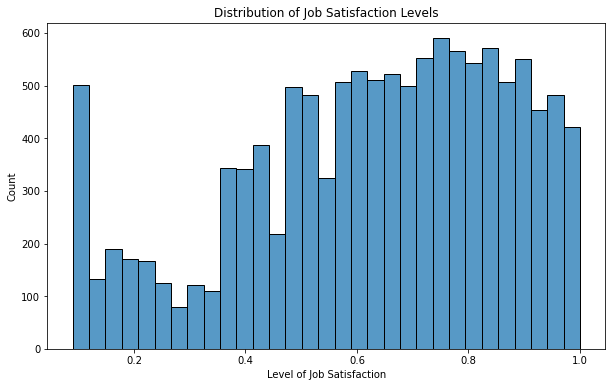

In [16]:
# Create a plot as needed
count_satis_level = (df_no_dups
                     .satisfaction_level
                     .value_counts()
                     .reset_index()
                     .assign(share=lambda x: 100 * x["satisfaction_level"] / df_no_dups.shape[0])
                     .sort_values("index")
)
print(count_satis_level.head(10))

plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_dups, x="satisfaction_level")
plt.title("Distribution of Job Satisfaction Levels")
plt.xlabel("Level of Job Satisfaction")
plt.show()

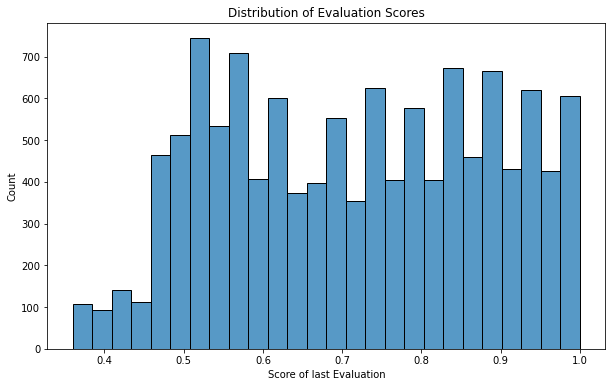

In [17]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_dups, x="last_evaluation")
plt.title("Distribution of Evaluation Scores")
plt.xlabel("Score of last Evaluation")
plt.show()

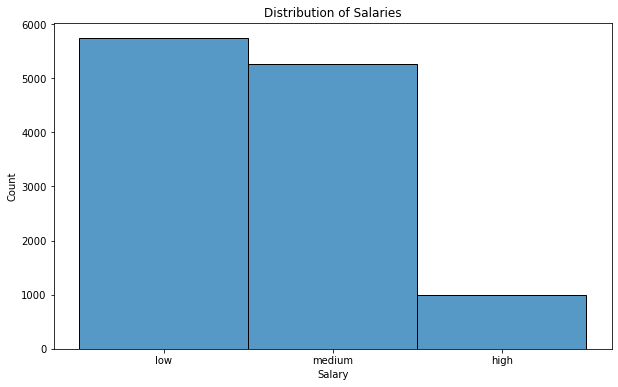

In [18]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_dups, x="salary")
plt.title("Distribution of Salaries")
plt.xlabel("Salary")
plt.show()

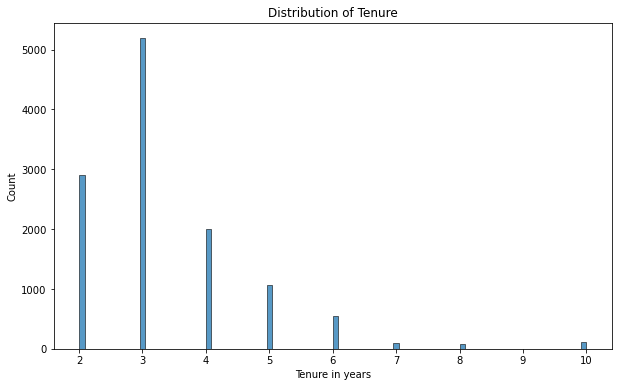

In [19]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_dups, x="tenure")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure in years")
plt.show()

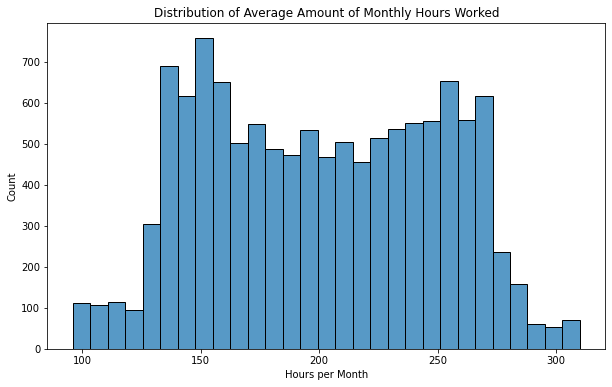

In [20]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_dups, x="average_monthly_hours")
plt.title("Distribution of Average Amount of Monthly Hours Worked")
plt.xlabel("Hours per Month")
plt.show()


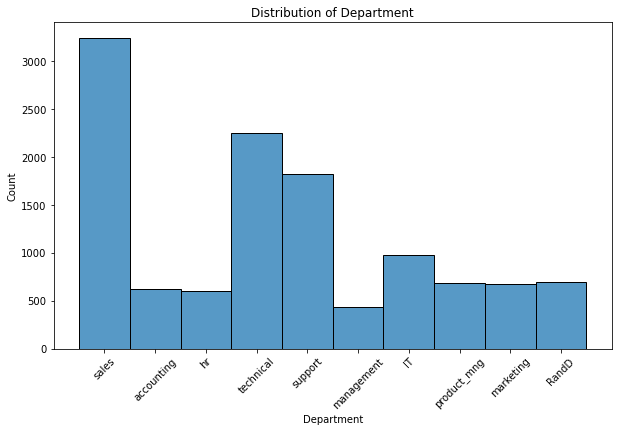

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_dups, x="department_name")
plt.title("Distribution of Department")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()
# Most employess worked in Sales

    satisfaction_level  has_left
0                 0.09  1.000000
1                 0.10  1.000000
2                 0.11  1.000000
3                 0.12  0.076923
4                 0.13  0.022222
..                 ...       ...
87                0.96  0.000000
88                0.97  0.000000
89                0.98  0.000000
90                0.99  0.000000
91                1.00  0.000000

[92 rows x 2 columns]


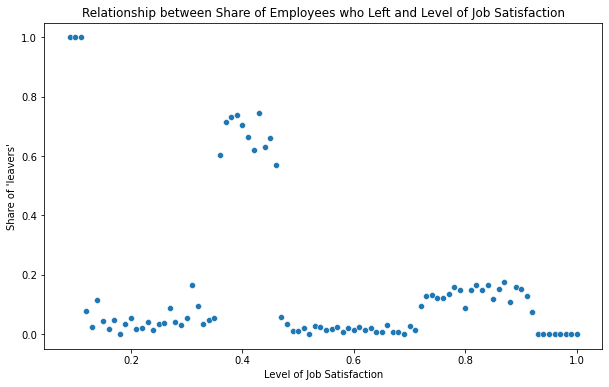

In [22]:
# Create a plot as needed
left_by_satisfaction = (df_no_dups
                        .groupby("satisfaction_level")
                        .has_left
                        .mean()
                        .reset_index()
)
print(left_by_satisfaction)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=left_by_satisfaction, x="satisfaction_level", y="has_left")
plt.title("Relationship between Share of Employees who Left and Level of Job Satisfaction")
plt.xlabel("Level of Job Satisfaction")
plt.ylabel("Share of 'leavers'")
plt.show()


All employes with minimal satisfaction level have left the company. However, the quit rate is much lower among the next group of unsatisfied employees. Then the "quit-rate" spikes again at around a satisfaction level of 0.4. Another minor "spike" occurs at around 0.7 to 0.9 satisfaction.

     average_monthly_hours  has_left
192                    288       1.0
193                    289       1.0
194                    290       1.0
195                    291       1.0
196                    292       1.0
197                    293       1.0
198                    294       1.0
199                    295       1.0
200                    296       1.0
201                    297       1.0
202                    298       1.0
203                    299       1.0
204                    300       1.0
205                    301       1.0
206                    302       1.0
207                    303       1.0
208                    304       1.0
209                    305       1.0
210                    306       1.0
211                    307       1.0
212                    308       1.0
213                    309       1.0
214                    310       1.0


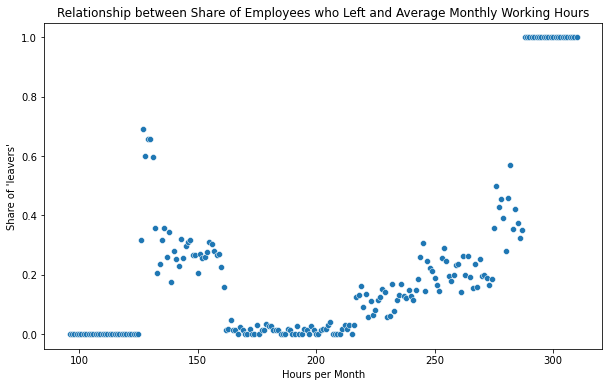

In [23]:
# Create a plot as needed
left_by_hours = (df_no_dups
                 .groupby("average_monthly_hours")
                 .has_left
                 .mean()
                 .reset_index()
)
print(left_by_hours.query("has_left > 0.9"))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=left_by_hours, x="average_monthly_hours", y="has_left")
plt.title("Relationship between Share of Employees who Left and Average Monthly Working Hours")
plt.xlabel("Hours per Month")
plt.ylabel("Share of 'leavers'")
plt.show()

Turnover is non-existant amongst the employees who worked the least. All employees who worked at least 288 hours per month on average have left the company. If we ignore the spike at around 150 working hours, the distribution looks similar to an exponential distribution.

    last_evaluation  has_left
0              0.36  0.000000
1              0.37  0.000000
2              0.38  0.000000
3              0.39  0.000000
4              0.40  0.000000
..              ...       ...
60             0.96  0.211538
61             0.97  0.220183
62             0.98  0.153846
63             0.99  0.152284
64             1.00  0.470000

[65 rows x 2 columns]


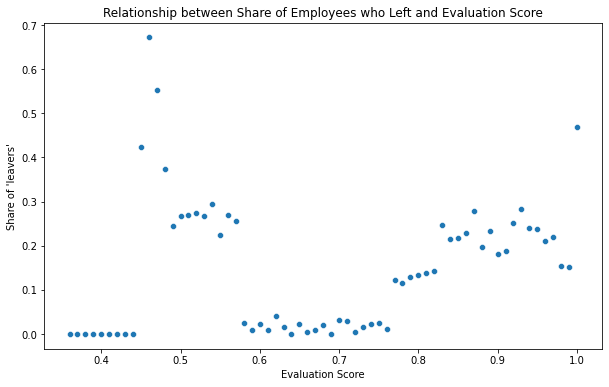

In [24]:
# Create a plot as needed
left_by_eval_score = (df_no_dups
                      .groupby("last_evaluation")
                      .has_left
                      .mean()
                      .reset_index()
)
print(left_by_eval_score)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=left_by_eval_score, x="last_evaluation", y="has_left")
plt.title("Relationship between Share of Employees who Left and Evaluation Score")
plt.xlabel("Evaluation Score")
plt.ylabel("Share of 'leavers'")
plt.show()


  department_name  has_left
0              IT  0.161885
1           RandD  0.122478
2      accounting  0.175523
3              hr  0.188020
4      management  0.119266
5       marketing  0.166419
6     product_mng  0.160350
7           sales  0.169805
8         support  0.171334
9       technical  0.173797


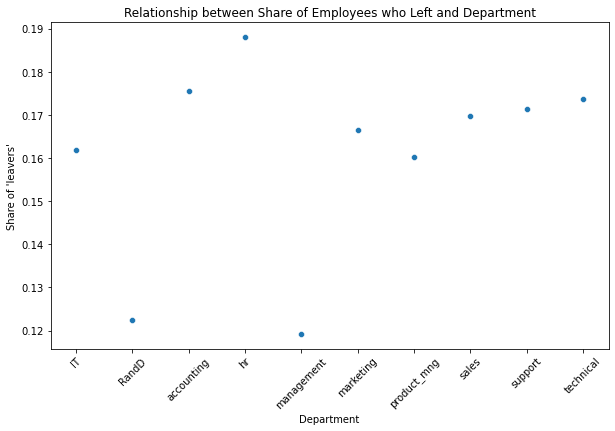

In [25]:
# Create a plot as needed
left_by_department = (df_no_dups
                      .groupby("department_name")
                      .has_left
                      .mean()
                      .reset_index()
)
print(left_by_department)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=left_by_department, x="department_name", y="has_left")
plt.title("Relationship between Share of Employees who Left and Department")
plt.xlabel("Department")
plt.ylabel("Share of 'leavers'")
plt.xticks(rotation=45)
plt.show()

     average_monthly_hours  satisfaction_level
20                     116            0.386667
181                    277            0.268571
182                    278            0.364091
183                    279            0.381304
184                    280            0.393200
185                    281            0.362083
186                    282            0.235714
187                    283            0.384118
188                    284            0.277368
190                    286            0.388235
191                    287            0.292000
192                    288            0.101667
193                    289            0.097143
194                    290            0.101250
195                    291            0.106667
196                    292            0.101429
197                    293            0.212857
198                    294            0.258889
199                    295            0.101250
200                    296            0.244000
201          

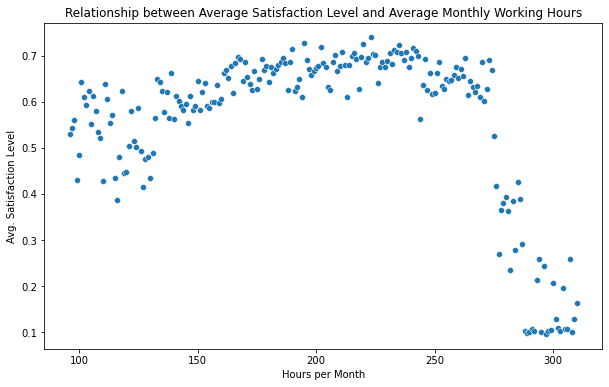

In [26]:
satifaction_by_hours = (df_no_dups
                        .groupby("average_monthly_hours")
                        .satisfaction_level
                        .mean()
                        .reset_index()
                       )
print(satifaction_by_hours.query("satisfaction_level < 0.4"))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=satifaction_by_hours, x="average_monthly_hours", y="satisfaction_level")
plt.title("Relationship between Average Satisfaction Level and Average Monthly Working Hours")
plt.xlabel("Hours per Month")
plt.ylabel("Avg. Satisfaction Level")
plt.show()


    last_evaluation  satisfaction_level
0              0.36            0.568421
1              0.37            0.547174
2              0.38            0.520714
3              0.39            0.508000
4              0.40            0.542041
..              ...                 ...
60             0.96            0.615481
61             0.97            0.633028
62             0.98            0.681298
63             0.99            0.712234
64             1.00            0.733600

[65 rows x 2 columns]


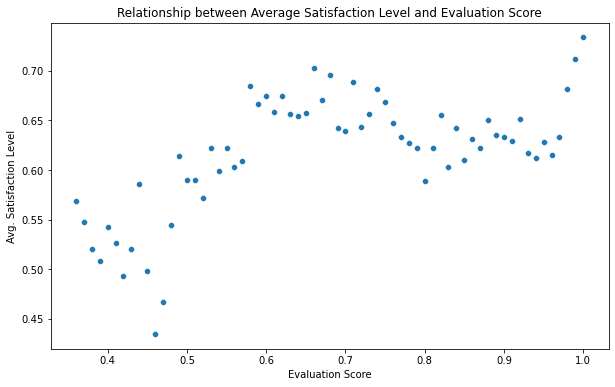

In [27]:
satifaction_by_eval = (df_no_dups
                       .groupby("last_evaluation")
                       .satisfaction_level
                       .mean()
                       .reset_index()
                       )
print(satifaction_by_eval)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=satifaction_by_eval, x="last_evaluation", y="satisfaction_level")
plt.title("Relationship between Average Satisfaction Level and Evaluation Score")
plt.xlabel("Evaluation Score")
plt.ylabel("Avg. Satisfaction Level")
plt.show()

    satisfaction_level  last_evaluation
27                0.36         0.571735
28                0.37         0.536385
29                0.38         0.548966
30                0.39         0.547117
31                0.40         0.539206
32                0.41         0.555096
33                0.42         0.573241
34                0.43         0.553972
35                0.44         0.548478
36                0.45         0.540165
37                0.46         0.553492
38                0.47         0.572353


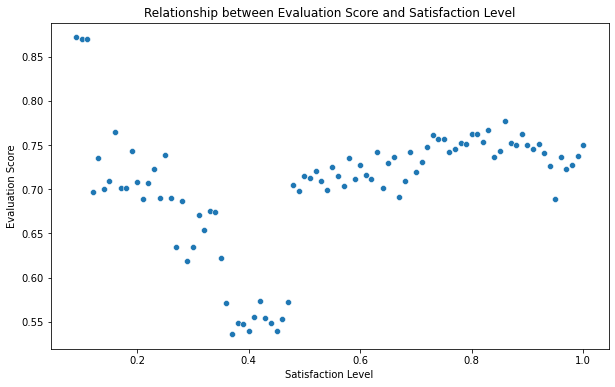

In [28]:
eval_by_satisfaction = (df_no_dups
                       .groupby("satisfaction_level")
                       .last_evaluation
                       .mean()
                       .reset_index()
                       )
print(eval_by_satisfaction.query("last_evaluation < 0.6"))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=eval_by_satisfaction, x="satisfaction_level", y="last_evaluation")
plt.title("Relationship between Evaluation Score and Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Score")
plt.show()


  department_name  satisfaction_level
0              IT            0.634016
1           RandD            0.627176
2      accounting            0.607939
3              hr            0.621947
4      management            0.631995
5       marketing            0.634770
6     product_mng            0.629825
7           sales            0.631349
8         support            0.634822
9       technical            0.627937


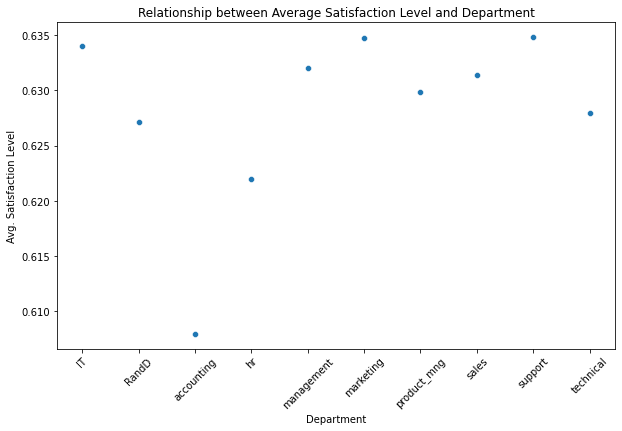

In [29]:
satifaction_by_dep = (df_no_dups
                       .groupby("department_name")
                       .satisfaction_level
                       .mean()
                       .reset_index()
                       )
print(satifaction_by_dep)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=satifaction_by_dep, x="department_name", y="satisfaction_level")
plt.title("Relationship between Average Satisfaction Level and Department")
plt.xlabel("Department")
plt.ylabel("Avg. Satisfaction Level")
plt.xticks(rotation=45)
plt.show()

   number_projects  average_monthly_hours
0                2             164.812263
1                3             197.337784
2                4             203.872456
3                5             209.125392
4                6             230.392252
5                7             275.620690


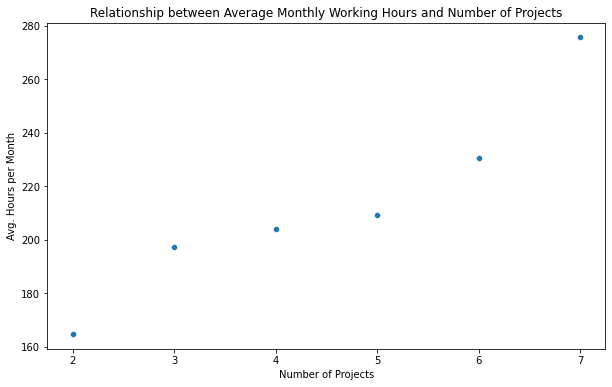

In [30]:
hours_by_project_count = (df_no_dups
                          .groupby("number_projects")
                          .average_monthly_hours
                          .mean()
                          .reset_index()
                         )
print(hours_by_project_count)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hours_by_project_count, x="number_projects", y="average_monthly_hours")
plt.title("Relationship between Average Monthly Working Hours and Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Avg. Hours per Month")
plt.show()


### Insights

It appears that there is a non-linear relationship between job-satisfaction and the tendency to leave the company. The average amount of monthly hours worked seems to exhibit the inverse realtionship. Suprisingly, the rate of employees who left the company is 0 amongst the group of employees with the lowest scores on their last evaluation.

In [31]:
df_cleaned = pd.get_dummies(df_no_dups)
scaler = MinMaxScaler()
df_cleaned["scaled_hours"] = scaler.fit_transform(df_cleaned[["average_monthly_hours"]])
df_cleaned.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,has_left,promoted_recently,department_name_IT,department_name_RandD,...,department_name_management,department_name_marketing,department_name_product_mng,department_name_sales,department_name_support,department_name_technical,salary_high,salary_low,salary_medium,scaled_hours
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,...,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.081394,0.057877,...,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714,0.082562,0.478692,0.438746,0.488194
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.273451,0.233520,...,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004,0.275230,0.499567,0.496254,0.227700
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.285047
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.485981
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.686916
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict which employees are most likely to leave the company.

### Identify the types of models most appropriate for this task.

Based on the binary nature of the outcome variable a logistic regression model tree-based classifier seem to be best suited for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [32]:
X = df_cleaned.drop(["has_left", "average_monthly_hours", "department_name_hr", "salary_low"], axis=1)
y = df_cleaned["has_left"]

df_cleaned.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

print(y_train.value_counts())
print(y_test.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   satisfaction_level           11991 non-null  float64
 1   last_evaluation              11991 non-null  float64
 2   number_projects              11991 non-null  int64  
 3   average_monthly_hours        11991 non-null  int64  
 4   tenure                       11991 non-null  int64  
 5   work_accident                11991 non-null  int64  
 6   has_left                     11991 non-null  int64  
 7   promoted_recently            11991 non-null  int64  
 8   department_name_IT           11991 non-null  uint8  
 9   department_name_RandD        11991 non-null  uint8  
 10  department_name_accounting   11991 non-null  uint8  
 11  department_name_hr           11991 non-null  uint8  
 12  department_name_management   11991 non-null  uint8  
 13  department_name_

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9592 entries, 6848 to 4585
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   satisfaction_level           9592 non-null   float64
 1   last_evaluation              9592 non-null   float64
 2   number_projects              9592 non-null   int64  
 3   tenure                       9592 non-null   int64  
 4   work_accident                9592 non-null   int64  
 5   promoted_recently            9592 non-null   int64  
 6   department_name_IT           9592 non-null   uint8  
 7   department_name_RandD        9592 non-null   uint8  
 8   department_name_accounting   9592 non-null   uint8  
 9   department_name_management   9592 non-null   uint8  
 10  department_name_marketing    9592 non-null   uint8  
 11  department_name_product_mng  9592 non-null   uint8  
 12  department_name_sales        9592 non-null   uint8  
 13  department_name

In [34]:
def compute_goodness_of_fit(model_name: str, y_real, y_predicted):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    y_real: real outcome
    y_predicted: predicted outcome

    Returns a pandas df with the F1, recall, precision, and accuracy scores.
    '''

    # Calculate metrics
    precision = precision_score(y_real, y_predicted)
    recall = recall_score(y_real, y_predicted)
    f1 = f1_score(y_real, y_predicted)
    accuracy = accuracy_score(y_real, y_predicted)

    # Create table of results
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
    })

    return table

In [35]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_train_log_pred = log_model.predict(X_train)

# Initialize PolynomialFeatures with interaction_only=False to also include squared terms
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Transform the features to include interaction terms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_interaction = poly.fit_transform(X_train_scaled)

X_train_interaction = X_train_interaction.astype(np.float64)

log_model_inter = LogisticRegression(max_iter=1000) # increasing max_iter necessary to prevent errors
log_model_inter.fit(X_train_interaction, y_train)

y_train_log_inter_pred = log_model_inter.predict(X_train_interaction)

In [36]:
# Predict on the test set
y_test_log_pred = log_model.predict(X_test)

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_interaction = poly.fit_transform(X_test_scaled)

y_test_log_inter_pred = log_model_inter.predict(X_test_interaction)

In [37]:
results_train = compute_goodness_of_fit(model_name="Logistic Classifier",
                                        y_real=y_train, y_predicted=y_train_log_pred)

results_train_inter = compute_goodness_of_fit(model_name="Logistic Classifier Interaction",
                                              y_real=y_train, y_predicted=y_train_log_inter_pred)

results_train =  pd.concat([results_train, results_train_inter], axis=0)
print(results_train)

results_test = compute_goodness_of_fit(model_name="Logistic Classifier",
                                       y_real=y_test, y_predicted=y_test_log_pred)
results_test_inter = compute_goodness_of_fit(model_name="Logistic Classifier Interaction",
                                              y_real=y_test, y_predicted=y_test_log_inter_pred)

results_test =  pd.concat([results_test, results_test_inter], axis=0)
print(results_test)

                             model  precision    recall        F1  accuracy
0              Logistic Classifier   0.494705  0.205273  0.290151  0.833194
0  Logistic Classifier Interaction   0.889308  0.887633  0.888470  0.962990
                             model  precision    recall        F1  accuracy
0              Logistic Classifier   0.502762  0.228643  0.314335  0.834514
0  Logistic Classifier Interaction   0.858942  0.856784  0.857862  0.952897


In [38]:
rf = RandomForestClassifier(random_state=1234)

cv_params = {
    "max_depth": [None],
    "max_features": (17, 10, 5),
    "max_samples": (0.6, 0.7),
    "min_samples_leaf": (2, 6),
    "min_samples_split": (4, 8),
    "n_estimators": (40, 50)
}

print(cv_params)

scoring_metrics = ["precision", "recall", "accuracy", "f1"]

rf1 = GridSearchCV(estimator = rf, scoring=scoring_metrics, param_grid=cv_params, cv=5, refit="f1")

{'max_depth': [None], 'max_features': (17, 10, 5), 'max_samples': (0.6, 0.7), 'min_samples_leaf': (2, 6), 'min_samples_split': (4, 8), 'n_estimators': (40, 50)}


In [39]:
%%time
rf1.fit(X_train, y_train)

rf_test_preds = rf1.best_estimator_.predict(X_test)

CPU times: user 1min 16s, sys: 0 ns, total: 1min 16s
Wall time: 1min 16s


In [40]:
print(rf1.best_score_)
print(rf1.best_params_)

0.9482081043952648
{'max_depth': None, 'max_features': 17, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50}


In [41]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [42]:
results_train_rf = make_results("Random Forest CV", rf1, "f1")
results_train =  pd.concat([results_train, results_train_rf], axis=0)

results_test_preds = compute_goodness_of_fit(model_name="Random Forest CV",
                                              y_real=y_test, y_predicted=rf_test_preds)

results_test = pd.concat([results_test, results_test_preds], axis=0)


In [43]:
xgb = XGBClassifier(objective='binary:logistic', random_state=1234)

cv_params = {
    "max_depth": [2],
    "min_child_weight": [2],
    "learning_rate": [0.3],
    "n_estimators": [50] # everything else takes way too long...
}

print(cv_params)

scoring_metrics = ["precision", "recall", "accuracy", "f1"]

xgb1 = GridSearchCV(estimator = xgb, scoring=scoring_metrics, param_grid=cv_params, cv=5, refit="f1")

{'max_depth': [2], 'min_child_weight': [2], 'learning_rate': [0.3], 'n_estimators': [50]}


In [44]:
%%time
xgb1.fit(X_train, y_train)
xgb_test_preds = xgb1.best_estimator_.predict(X_test)

CPU times: user 6min 8s, sys: 0 ns, total: 6min 8s
Wall time: 3min 4s


In [45]:
print(xgb1.best_score_)
print(xgb1.best_params_)

0.9350358450069631
{'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 50}


In [46]:
results_train_xgb = make_results("XGBoost CV", xgb1, "f1")
results_train = pd.concat([results_train, results_train_xgb], axis=0)

results_test_xgb = compute_goodness_of_fit(model_name="XGBoost CV",
                                           y_real=y_test, y_predicted=xgb_test_preds)
results_test = pd.concat([results_test, results_test_xgb], axis=0)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



The simple logistic classifier performs the worst of all models tested. Only 50.2% of all positives (people who were predicted to leave the company) were true positives (people who were predicted to leave the company and actually left; precision score) and it was only able to correctly predict 22.9% of all people who left (recall score). Its overall accuracy was 83.45% indicating that it did a solid jpb of predicting true negatives (people who were predicted to stay and actually stayed at the company). The model did slightly better on the test than on the training data.

The more flexible logistic classifier improved a lot over the simpler version resulting in a precision score of 85.9% and a recall score of 85.7% with an overall accuracy of 95.3%. The preformance on the test data was worse than on the training data.

The cross validated random forest performed best amongst all tested models. 98.9% of all employees it predicted to leave actually left and of all employees who left it correctly predicted 91.7% to leave. It also achieved an accuracy score of 98.4% and performed better on the test than on the training data.

The cross validated XGBoost algorithm (*that wasn't actually cross validated due to performance issues*) performed worse than the random forest whilst also having a worse runtime (i.e. taking longer to complete). 96.2% of all employees it predicted to leave actually left and of all employees who left it correctly predicted 90.5% to leave. It achieved an accurry score of 97.9% and has a better precision but worse recall score on the test than on the training data.

In [49]:
print("Training Scores:")
print(results_train)
print("Testing Scores:")
print(results_test)

Training Scores:
                             model  precision    recall        F1  accuracy
0              Logistic Classifier   0.494705  0.205273  0.290151  0.833194
0  Logistic Classifier Interaction   0.889308  0.887633  0.888470  0.962990
0                 Random Forest CV   0.985199  0.914000  0.948208  0.983424
0                       XGBoost CV   0.953650  0.917145  0.935036  0.978837
Testing Scores:
                             model  precision    recall        F1  accuracy
0              Logistic Classifier   0.502762  0.228643  0.314335  0.834514
0  Logistic Classifier Interaction   0.858942  0.856784  0.857862  0.952897
0                 Random Forest CV   0.989160  0.917085  0.951760  0.984577
0                       XGBoost CV   0.962766  0.909548  0.935401  0.979158


### Confusion Matrix Random Forest
There are more true negatives than true positives, which is in accordance with the raw data. Overall the performance of the random forest is very good. It only predicted 4 false positives (employees who didn't leave the company despite being predicted to) and 33 false negatives (employees who left the company despite being predicted to stay).

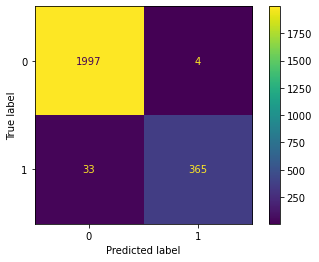

In [51]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_test_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format="");

### Confusion Matrix XGBoost
The XGBoost predicted 10 more false positives and 3 more false negatives than the random forest .

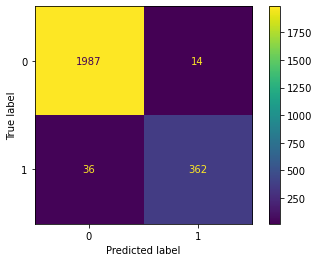

In [52]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_, 
                             )
disp.plot(values_format="");

### Feature Importance Random Forest
The most important predictor according to the random forest is job satisfaction (to be honest this result shouldn't require hiring a data professional) followed by the number of projects, the score on the last evaluation, tenure and average monthly working hours, although the latter ones aren't even half as important as the satisfaction level. The other factors' importance is negligible.

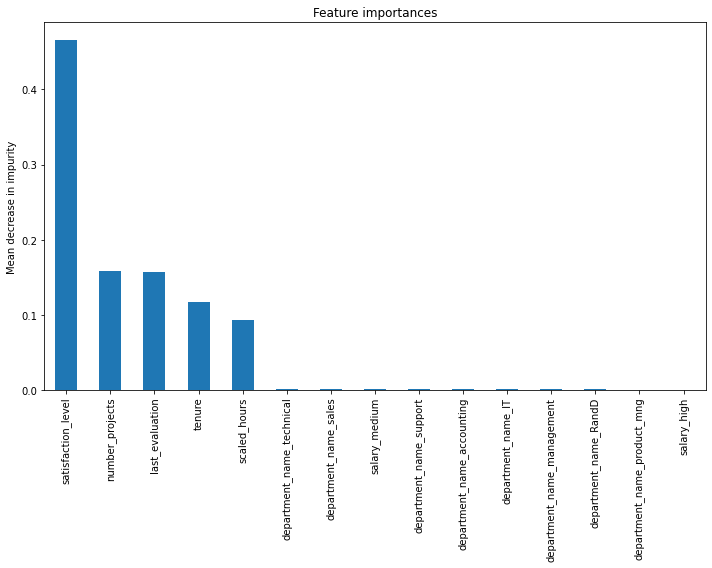

In [53]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(10,8))
rf_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout();

### Feature Importance XGBoost
Compared to the random forest, the XGBoost assigned a substantially lower importance to job satisfaction and a slightly higher importance to the other features. The number of projects and tenure are almost as important as the satisfaction level. Other important factors are the score on the last evaluation, the average monthly working hours, having suffered a work accident and having a high or medium salary. The importance of the other factors is negligible.

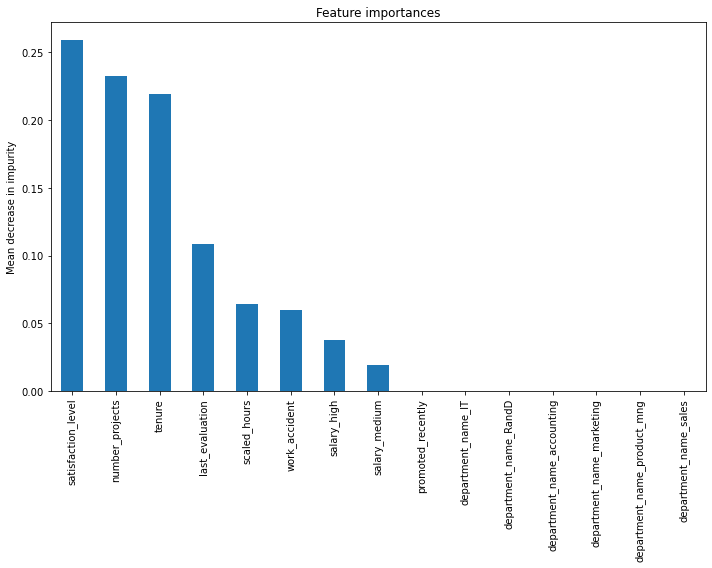

In [54]:
importances = xgb1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(10,8))
rf_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout();

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.